In [ ]:
import pandas as pd
import numpy as np

# 1. Load the Data
# Use the correct file name: training.csv
file_path = '../data/raw/training.csv'
try:
    df = pd.read_csv(file_path)
    print("Correct transaction data loaded successfully!")
    print(f"Dataset shape: {df.shape}\n")
except FileNotFoundError:
    print(f"Error: training.csv not found at path: {file_path}")
    exit()

# 2. Overview of the Data (Must check types here)
df.info()

# 3. Handling TransactionStartTime (Critical Step)
# This is required for calculating Recency (R in RFM)
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# 4. Identify Numerical and Categorical Columns
# Based on the data dictionary provided in the challenge (Page 3)
numerical_cols = [
    'Amount',        # Value of the transaction [cite: 42]
    'Value',         # Absolute value of the amount [cite: 43]
    'FraudResult'    # Treat as numerical for correlation analysis (1=Yes, 0=No) [cite: 46]
]

# Note: Id columns (like AccountId, BatchId) should be treated as categorical for frequency/unique counts
categorical_cols = [
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId',
    'CurrencyCode',   # Country currency [cite: 38]
    'CountryCode',    # Numerical geographical code [cite: 39]
    'ProviderId',     # Source provider [cite: 39]
    'ProductId',      # Item name [cite: 40]
    'ProductCategory',# Broader category [cite: 41]
    'ChannelId',      # Customer channel (web, Android, IOS, pay later, checkout) [cite: 41]
    'PricingStrategy' # Xente's pricing structure [cite: 45]
]

# 5. Proceed with the rest of Task 2
print("\n--- Numerical Summary Statistics ---")
print(df[numerical_cols].describe())

# 6. Continue with Missing Values, Distributions, Outliers, and Correlation...

In [8]:
# Calculate the total count of missing values per column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values per column
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100

# Combine the count and percentage into a single DataFrame for easy review
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Filter the summary to show only columns with at least one missing value,
# and sort them in descending order of missing percentage.
missing_data_summary = missing_data_summary[missing_data_summary['Missing Count'] > 0].sort_values(
    by='Missing Percentage',
    ascending=False
)

print("--- Missing Value Summary (Sorted by Percentage) ---")
print(missing_data_summary)

--- Missing Value Summary (Sorted by Percentage) ---
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


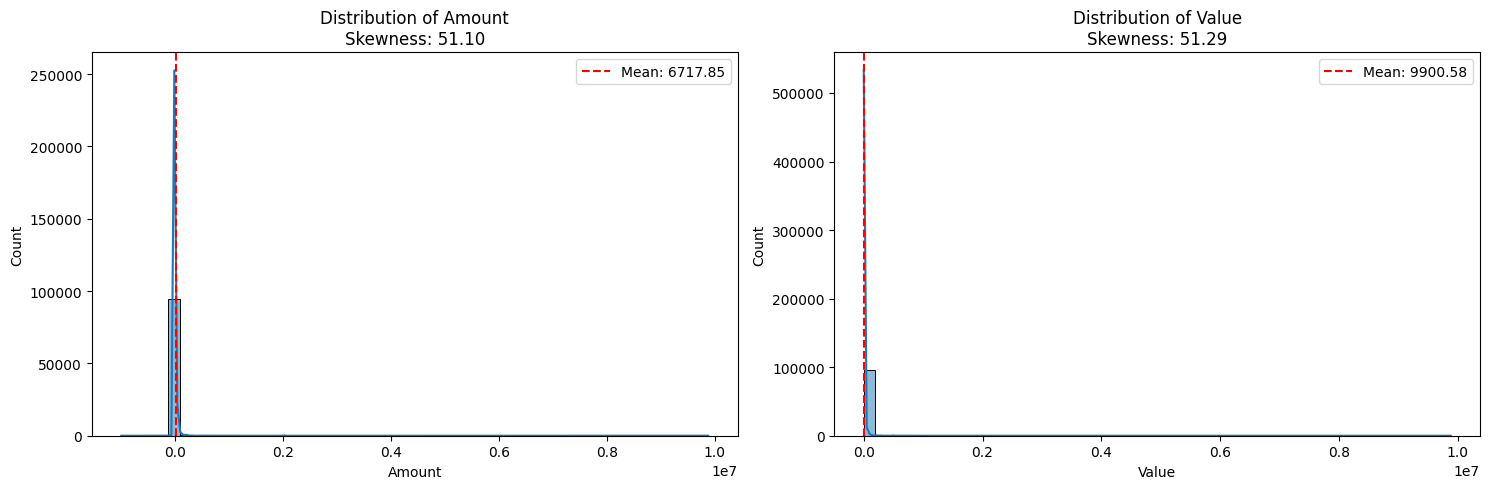

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to analyze
monetary_features = ['Amount', 'Value']

plt.figure(figsize=(15, 5))

# Loop through the features and plot their distribution
for i, col in enumerate(monetary_features):
    plt.subplot(1, 2, i + 1)
    
    # Use displot (or histplot in newer seaborn versions) for a histogram/KDE
    sns.histplot(df[col], kde=True, bins=50)
    
    # Calculate and display the skewness coefficient
    skewness = df[col].skew()
    plt.title(f'Distribution of {col}\nSkewness: {skewness:.2f}')
    
    # Add a vertical line for the mean for visual comparison
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Example visualization: Highly skewed distribution
#

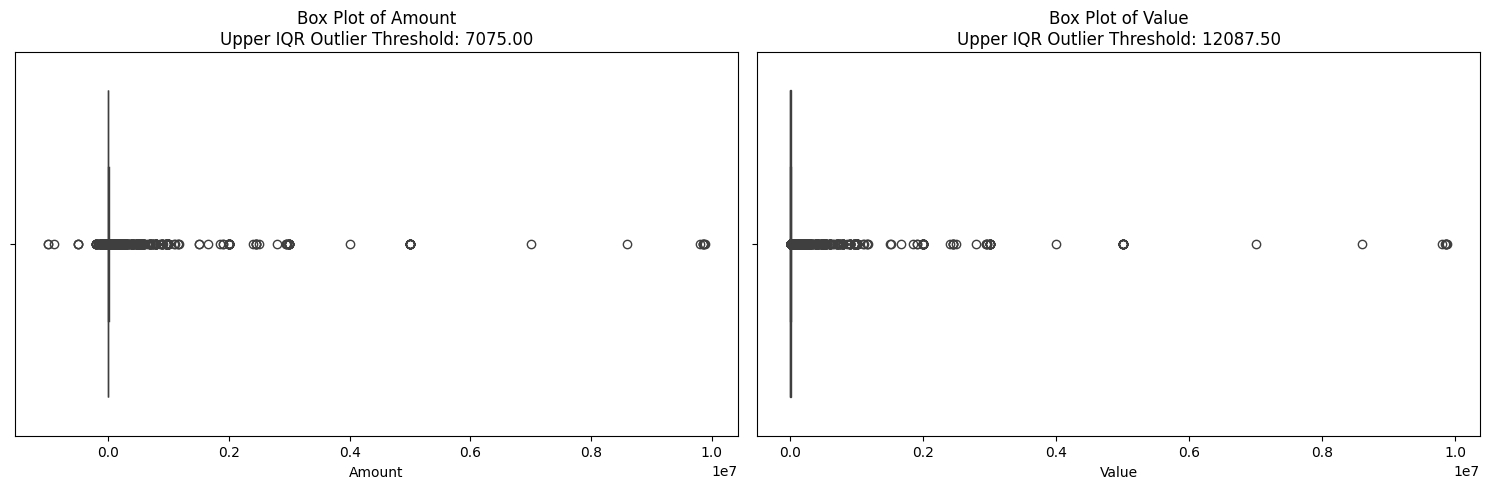

In [12]:
plt.figure(figsize=(15, 5))

# Loop through the features and plot their box plots
for i, col in enumerate(monetary_features):
    plt.subplot(1, 2, i + 1)
    
    # Use the box plot to visualize outliers
    sns.boxplot(x=df[col])
    
    # Calculate the IQR and outlier boundaries (Q3 + 1.5*IQR) for reference
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    
    plt.title(f'Box Plot of {col}\nUpper IQR Outlier Threshold: {upper_bound:.2f}')

plt.tight_layout()
plt.show()



--- Correlation Matrix ---
               Amount     Value  FraudResult
Amount       1.000000  0.989692     0.557370
Value        0.989692  1.000000     0.566739
FraudResult  0.557370  0.566739     1.000000


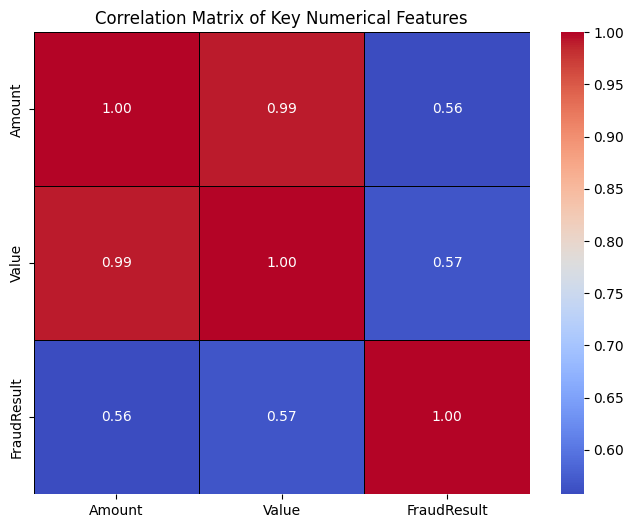

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features identified for the Xente transaction data
numerical_cols = ['Amount', 'Value', 'FraudResult']

# 1. Calculate the Correlation Matrix (Pearson method is the default)
correlation_matrix = df[numerical_cols].corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# 2. Visualize the Correlation Matrix using a Heatmap
plt.figure(figsize=(8, 6))

# Use 'annot=True' to show the correlation values on the map
# Use 'fmt=".2f"' to format the values to two decimal places
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm', # Use a diverging colormap
    cbar=True,
    linewidths=.5,
    linecolor='black'
)

plt.title('Correlation Matrix of Key Numerical Features')
plt.show()

# Example visualization: Heatmap
#

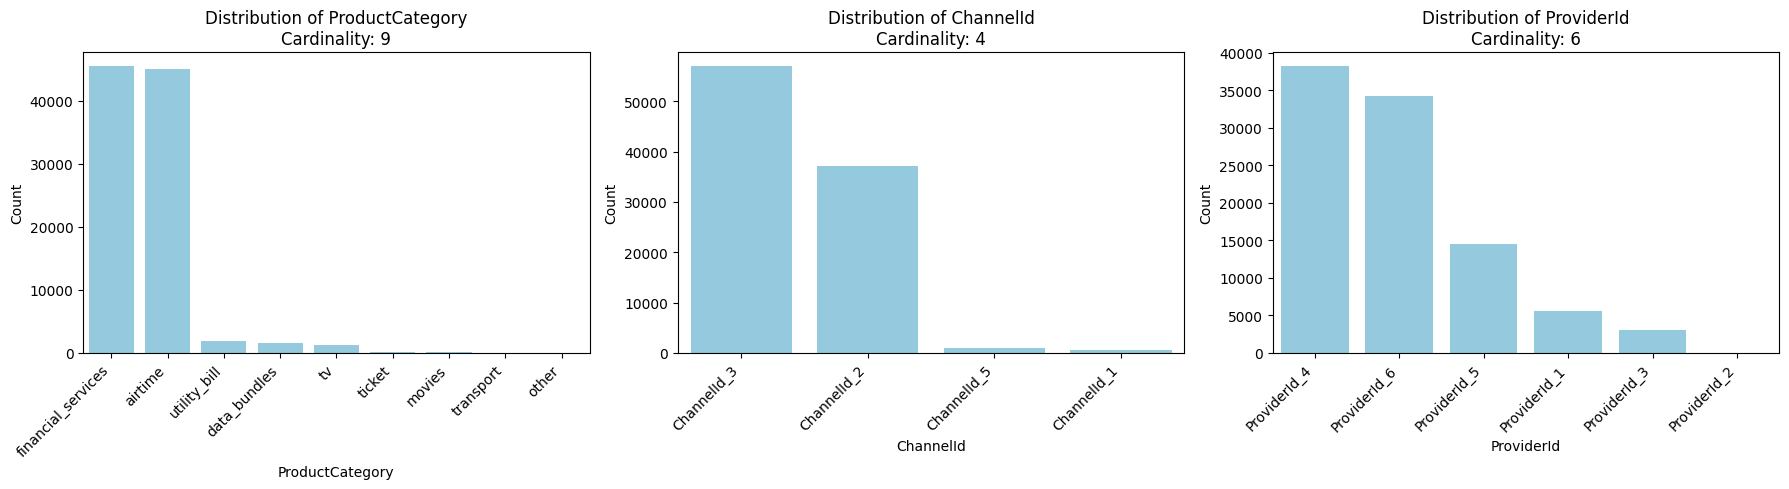

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the key categorical features for visualization
# Based on the Xente data dictionary, these are often the most important context features
categorical_cols_to_plot = ['ProductCategory', 'ChannelId', 'ProviderId']

plt.figure(figsize=(18, 5))

# Loop through the features and plot their distributions
for i, col in enumerate(categorical_cols_to_plot):
    # Calculate the value counts and take the top 10 categories
    value_counts = df[col].value_counts().nlargest(10)
    
    # Calculate cardinality
    cardinality = df[col].nunique()

    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, i+1 position
    
    # Create the bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
    
    # Add labels and rotate x-axis for readability
    plt.title(f'Distribution of {col}\nCardinality: {cardinality}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Example visualization: Bar plot showing category frequencies
#